In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_polar_line(point, angle, length):
    """
    point - tuple(x, y), of start point
    angle - angle in radians
    length - the length of the line
    """
    x, y = point

     # compute end of the line, yay trig
    end_y = y + length * np.sin(np.radians(angle))
    end_x = x + length * np.cos(np.radians(angle))

    plt.plot([x, end_x], [y, end_y])
    plt.plot(end_x, end_y, 'o')
    return [end_x, end_y]

# Inverse Kinematics
<img src="leg_geometry.jpg" alt="Leg geometry" width="600"/>

Figure 1: Geometry of leg position and angles. The * is replaced by either L or R to signify left or right leg variable in the code.


In [9]:
# robot dimensions:
tibia = 0.1 
thigh = 0.10274

# consts
hip_height = 0.185 # in meters from the ground
ankle_height = 0.04519 # in meters from the ground, when the ankle is placed on the ground
com_offset = 0 # in meters the offset of the center of mass in the x direction

# control
foot_height = 0.00 # in meters from the ground, below the hip 
forward = 0.02244612 # the ankle position in meters forward from the hip position, (x direction)
left = 0 # the displacement in meters of the foot while steping sideways, (y direction)


# vertical distance between the ankle and the hip
leg_height = hip_height - foot_height - ankle_height
# when side stepping we extend the foot slightly further:
leg_x_0 = leg_height / np.cos(left)

# the final leg extension in the x direction is computed using the forward component and the com_offset:
leg_x = np.sqrt((leg_x_0 ** 2) + ((forward + com_offset) ** 2))
print("leg_x:", leg_x)

# computing beta1 and beta2 from figure 1:
beta1 = np.arccos((thigh ** 2) + (leg_x ** 2) - (tibia ** 2)) / (2 * thigh * leg_x)
beta2 = np.arccos((tibia ** 2) + (leg_x ** 2) - (thigh ** 2)) / (2 * tibia * leg_x)


hip_pitch = beta1 + np.arcsin(forward / leg_x) + 3 * (np.pi / 2)
knee_pitch = beta2 + np.pi

ankle_pitch = knee_pitch - hip_pitch

hip_pitch = 3 * (np.pi / 2) - hip_pitch
ankle_pitch = 1 * (np.pi / 2) - ankle_pitch

print("expected: ", -0.50059056)
print("hip_pitch:", np.radians(hip_pitch))
print("knee_pitch:", np.radians(knee_pitch))
print("ankle_pitch:", np.radians(ankle_pitch))

leg_x: 0.1416003686543732
expected:  -0.50059056
hip_pitch: 1.014907397037587
knee_pitch: 1.0108770769344053
ankle_pitch: 0.03144588788398564


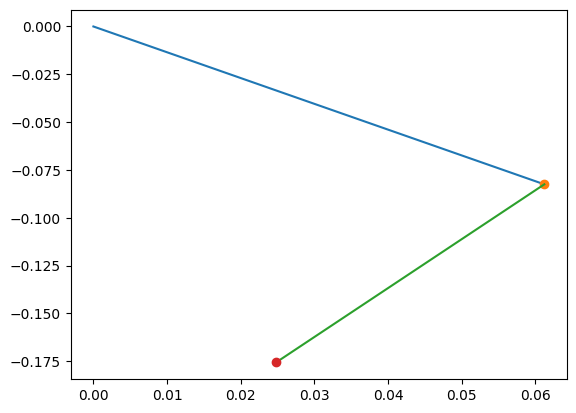

In [5]:
end = plot_polar_line([0, 0], hip_pitch, thigh)
plot_polar_line(end, hip_pitch - knee_pitch, tibia)

plt.show()

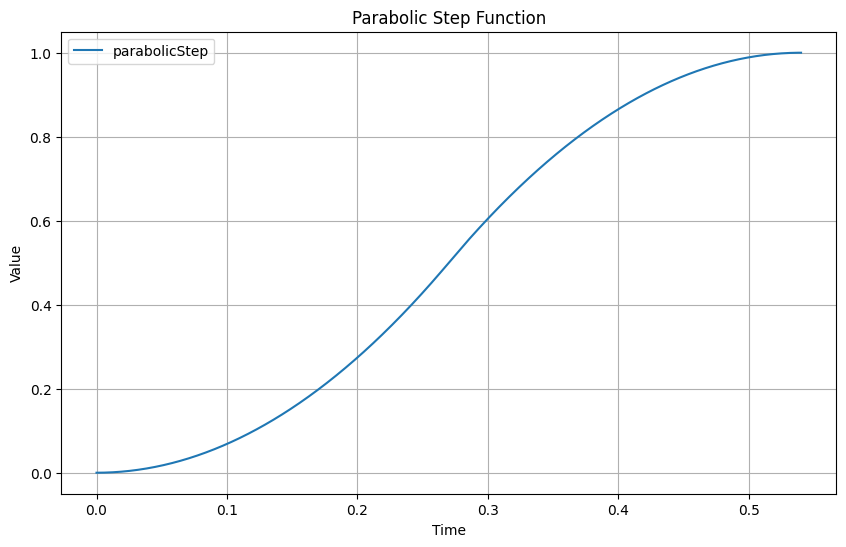

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def parabolicStep(time, period, deadTimeFraction):
    deadTime = period * deadTimeFraction / 2
    dt = 0.01  # You can adjust the step size (dt) as needed
    if time < deadTime + dt / 2:
        return 0
    if time > period - deadTime - dt / 2:
        return 1
    timeFraction = (time - deadTime) / (period - 2 * deadTime)
    if time < period / 2:
        return 2.0 * timeFraction * timeFraction
    return 4 * timeFraction - 2 * timeFraction * timeFraction - 1

# Define parameters
period = 0.540
deadTimeFraction = 0
start_time = 0
end_time = period

# Generate data
time_values = np.linspace(start_time, end_time, num=1000)
step_values = [parabolicStep(t, period, deadTimeFraction) for t in time_values]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(time_values, step_values, label='parabolicStep')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Parabolic Step Function')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = np.array([    -0.000033375538,0.025,-0.00013370618,0.025,-0.000301606,0.025,-0.00053280767,0.025,-0.00084398,0.025,-0.0012173206,0.025,-0.0016541708,0.025,-0.0022141642,0.025,-0.0027781918,0.025,-0.0034160123,0.025,-0.0041753366,0.025,-0.0049257483,0.025,-0.0057755965,0.025,-0.0067776404,0.025,-0.007680612,0.025,-0.008835787,0.025,-0.009909857,0.025,-0.011129809,0.025,-0.012369727,0.025,-0.0137159,0.025,-0.014837178,0.025,-0.016031524,0.025,-0.017082715,0.025,-0.018105865,0.025,-0.019024521,0.025,-0.019919274,0.025,-0.020701855,0.025,-0.021430025,0.025,-0.022114808,0.025,0.025,0.024929784,0.025,0.02473125,0.025,0.024384195,0.025,0.02390792,0.025,0.023268068,0.025,0.022556547,0.025,0.02166171,0.025,0.02062264,0.025,0.019457404,0.025,0.018138437,0.025,0.016730301,0.025,0.015127508,0.025,0.013389717,0.025,0.011588176,0.025,0.009484599,0.025,0.007357808,0.025,0.005207559,0.025,0.0027224217,0.025,0.00018430874,0.025,-0.0023722295,0.025,-0.004753923,0.025,-0.0070132036,0.025,-0.009160006,0.025,-0.011252718,0.025,-0.013093891,0.025,-0.01483993,0.025,-0.016455682,0.025,-0.017921811,0.025,-0.019228326,0.024929186,0.025,0.024717774,0.025,0.024404597,0.025,0.023879895,0.025,0.023276327,0.025,0.02251295,0.025,0.02161446,0.025,0.020676829,0.025,0.019418098,0.025,0.018132647,0.025,0.016636532,0.025,0.015035767,0.025,0.013362199,0.025,0.011575021,0.025,0.009564981,0.025,0.0073898695,0.025,0.0051029734,0.025,0.0027141236,0.025,0.00019450672,0.025,-0.002318263,0.025,-0.0048683994,0.025,-0.0071326066,0.025,-0.009143697,0.025,-0.011276877,0.025,-0.013134347,0.025,-0.014847817,0.025,-0.016457958,0.025,-0.017909514,0.025,-0.019280786,0.025,0.025,0.02493506,0.025,0.024728352,0.025,0.02438773,0.025,0.023933483,0.025,0.0233126,0.025,0.022542192,0.025,0.021655865,0.025,0.020633746,0.025,0.019473953,0.025,0.018238727,0.025,0.016717333,0.025,0.0151229575,0.025,0.013409216,0.025,0.011583961,0.025,0.009537756,0.025,0.007409634,0.025,0.0052455384,0.025,0.0027611274,0.025,0.00027813017,0.025,-0.0022568107,0.025,-0.0047599785,0.025,-0.007028127,0.025,-0.009225709,0.025,-0.0115894545,0.025,-0.014708104,0.025,-0.016427463,0.025,-0.017934902,0.025,-0.019187363,0.024926372,0.025,0.024715776,0.025,0.024393635,0.025,0.023885151,0.025,0.02327742,0.025,0.02251468,0.025,0.021647777,0.025,0.020594044,0.025,0.019403428,0.025,0.018101731,0.025,0.016660437,0.025,0.015103086,0.025,0.013395795,0.025,0.011472501,0.025,0.009538564,0.025,0.0073550977,0.025,0.0050927047,0.025,0.0026929788,0.025,0.00022770464,0.025,-0.0023757573,0.025,-0.004834641,0.025,-0.0071063284,0.025,-0.009256976,0.025,-0.011239218,0.025,-0.013148712,0.025,-0.014847493,0.025,-0.016477967,0.025,-0.01790342,0.025,-0.019254165,0.025,0.025,0.024931626,0.025,0.02472564,0.025,0.02438312,0.025,0.023902986,0.025,0.023281205,0.025,0.022546189,0.025,0.021628534,0.025,0.020618854,0.025,0.019427115,0.025,0.018144108,0.025,0.01680765,0.025,0.015143076,0.025,0.013400215,0.025,0.011597216,0.025,0.009611792,0.025,0.0075291637,0.025,0.0052952617,0.025,0.0026623402,0.025,-0.002261782,0.025,-0.004748773,0.025,-0.0070145447,0.025,-0.00915754,0.025,-0.01167704,0.025,-0.014669394,0.025,-0.016408348,0.025,-0.017838093,0.025,-0.019170703,0.024908083,0.025,0.024399599,0.025,0.023893226,0.025,0.02331111,0.025,0.022518419,0.025,0.021620287,0.025,0.02066744,0.025,0.019454472,0.025,0.018134857,0.025,0.01668014,0.025,0.01510741,0.025,0.01339775,0.025,0.011545159,0.025,0.0095368,0.025,0.0074932296,0.025,0.0051532183,0.025,0.002817262,0.025,0.0002637934,0.025,-0.0022815708,0.025,-0.0047784857,0.025,-0.0070433076,0.025,-0.009171201,0.025,-0.0110815,0.025,-0.013031101,0.025,-0.014821792,0.025,-0.016381146,0.025,-0.017905539,0.025,-0.019191986,0.025,0.025,0.024926312,0.025,0.024715692,0.025,0.024367496,0.025,0.023883112,0.025,0.023255799,0.025,0.02251305,0.025,0.02159794,0.025,0.020565823,0.025,0.019426923,0.025,0.018147271,0.025,0.016621187,0.025,0.015066135,0.025,0.013348946,0.025,0.011477415,0.025,0.009477277,0.025,0.0073902477,0.025,0.0050714556,0.025,0.0027363002,0.025,0.00023289025,0.025,-0.0024126954,0.025,-0.004728472,0.025,-0.0071554314,0.025,-0.009271933,0.025,-0.011259152,0.025,-0.013142848,0.025,-0.014790988,0.025,-0.016461862,0.025,-0.017930752,0.025,-0.01923219,0.025,-0.020419883,0.025,-0.021444755,0.02492383,0.025,0.024713913,0.025,0.02437868,0.025,0.023882609,0.025,0.023281194,0.025,0.022491839,0.025,0.02159827,0.025,0.020611495,0.025,0.019386146,0.025,0.01807292,0.025,0.016623449,0.025,0.0151052205,0.025,0.013320322,0.025,0.011481049,0.025,0.009486223,0.025,0.0073488094,0.025,0.0051158406,0.025,0.00276782,0.025,0.00016327389,0.025,-0.002434248,0.025,-0.0047996994,0.025,-0.007084852,0.025,-0.00920161,0.025,-0.011194503,0.025,-0.013152206,0.025,-0.014869256,0.025,-0.01639898,0.025,-0.017934458,0.025,-0.019265307,0.025,-0.020440402,0.025,-0.021483572,0.025,-0.022376126,0.025,-0.023154272,0.025,-0.023813622,0.025,-0.024312949,0.025,-0.024684107,0.025,-0.024905061,0.025,0.025,0.024934147,0.025,0.024725178,0.025,0.024369292,0.025,0.023887167,0.025,0.023269102,0.025,0.022529107,0.025,0.021605069,0.025,0.020606564,0.025,0.019437995,0.025,0.018159162,0.025,0.016648013,0.025,0.01509403,0.025,0.013335747,0.025,0.011529336,0.025,0.0095876595,0.025,0.007483382,0.025,0.005105568,0.025,0.002712503,0.025,0.00015669689,0.025,-0.0024124924,0.025,-0.0047173854,0.025,-0.007075524,0.025,-0.0092254225,0.025,-0.011255803,0.025,-0.013091182,0.025,-0.014872717,0.025,-0.016338574,0.025,-0.017916365,0.025,-0.01925485,0.025,-0.020434959,0.025,-0.021484615,0.025,-0.022389429,0.025,-0.023178848,0.025,-0.023816692,0.024932085,0.025,0.024728604,0.025,0.02438839,0.025,0.02390202,0.025,0.02329102,0.025,0.022546427,0.025,0.021681901,0.025,0.020622682,0.025,0.01954006,0.025,0.018141156,0.025,0.016750162,0.025,0.015188067,0.025,0.013470493,0.025,0.011706336,0.025,0.009635967,0.025,0.0075128917,0.025,0.005218709,0.025,0.0028380826,0.025,0.0002548732,0.025,-0.002248317,0.025,-0.004686093,0.025,-0.006894933,0.025,-0.009094035,0.025,-0.0110190045,0.025,-0.013072496,0.025,-0.014746988,0.025,-0.01636188,0.025,-0.017842079,0.025,-0.019205911,0.025,-0.020344926,0.025,-0.021411018,0.025,0.025,0.024925875,0.025,0.024715977,0.025,0.024367062,0.025,0.02390801,0.025,0.023268634,0.025,0.022510432,0.025,0.021634249,0.025,0.020559065,0.025,0.019440215,0.025,0.018098405,0.025,0.016691323,0.025,0.015084936,0.025,0.013344364,0.025,0.0115049025,0.025,0.009501859,0.025,0.0073800553,0.025,0.005096972,0.025,0.0028115045,0.025,0.00016750768,0.025,-0.0024186186,0.025,-0.0046988185,0.025,-0.0071419496,0.025,-0.0092430655,0.025,-0.01120807,0.025,-0.013054097,0.025,-0.014871383,0.025,-0.016424997,0.025,-0.017935252,0.025,-0.019268258,0.024937762,0.025,0.024727289,0.025,0.024384946,0.025,0.023906186,0.025,0.023293948,0.025,0.022561809,0.025,0.021673327,0.025,0.020625757,0.025,0.019422406,0.025,0.018138072,0.025,0.016754556,0.025,0.015131736,0.025,0.0134376325,0.025,0.01154984,0.025,0.009627469,0.025,0.0074949656,0.025,0.0053006075,0.025,0.0027930737,0.025,0.00023375079,0.025,-0.0023574885,0.025,-0.004715884,0.025,-0.0069007706,0.025,-0.009015536,0.025,-0.011212742,0.025,-0.013063537,0.025,-0.014823938,0.025,-0.016338242,0.025,-0.017872782,0.025,-0.01922729,0.025,-0.020414012,0.025,-0.021435296,0.025,-0.02232982,0.025,0.025,0.024922274,0.025,0.024706846,0.025,0.02436579,0.025,0.023867887,0.025,0.023286965,0.025,0.022507671,0.025,0.02157648,0.025,0.020526731,0.025,0.019398097,0.025,0.018106645,0.025,0.016598314,0.025,0.015003672,0.025,0.013253091,0.025,0.011515244,0.025,0.009528408,0.025,0.007291261,0.025,0.004995724,0.025,0.0025839396,0.025,0.000074723735,0.025,-0.0023436658,0.025,-0.0048786514,0.025,-0.0071458872,0.025,-0.009367051,0.025,-0.011323648,0.025,-0.013161952,0.025,-0.014938688,0.025,-0.016546017,0.025,-0.018008256,0.025,-0.019305313,0.025,-0.020417107,0.025,-0.021533335,0.025,-0.022429572,0.025,-0.023212088,0.025,-0.023847645,0.025,-0.02433343,0.025,-0.02469715,0.024931325,0.025,0.024725122,0.025,0.024390347,0.025,0.023913588,0.025,0.023283383,0.025,0.022524185,0.025,0.021652328,0.025,0.020627702,0.025,0.01948297,0.025,0.01814113,0.025,0.016676717,0.025,0.015088799,0.025,0.0134101575,0.025,0.011632213,0.025,0.009515456,0.025,0.007397946,0.025,0.005149234,0.025,0.002812555,0.025,0.00025537983,0.025,-0.0023706555,0.025,-0.004805494,0.025,-0.0070563313,0.025,-0.009226574,0.025,-0.011262225,0.025,-0.013041044,0.025,-0.014849091,0.025,-0.016473645,0.025,-0.017866218,0.025,-0.019225938,0.025,0.025,0.024933621,0.025,0.024718259,0.025,0.024373934,0.025,0.023892667,0.025,0.023280632,0.025,0.022537865,0.025,0.021661356,0.025,0.020584406,0.025,0.019437931,0.025,0.018111382,0.025,0.016682576,0.025,0.015107944,0.025,0.013364285,0.025,0.011537726,0.025,0.009524926,0.025,0.0074027963,0.025,0.0051451884,0.025,0.002720315,0.025,0.00022835657,0.025,-0.0023646355,0.025,-0.0047438797,0.025,-0.0070833433,0.025,-0.009111857,0.025,-0.011198426,0.025,-0.013136251,0.025,-0.014824199,0.025,-0.016448988,0.025,-0.017827058,0.025,-0.019245135,0.025,-0.020437079,0.025,-0.02147845,0.024934318,0.025,0.024744432,0.025,0.024402235,0.025,0.023907019,0.025,0.023286412,0.025,0.022482025,0.025,0.021672424,0.025,0.020634294,0.025,0.019467216,0.025,0.018177593,0.025,0.016717467,0.025,0.015104826,0.025,0.013368062,0.025,0.011562246,0.025,0.009541608,0.025,0.007401308,0.025,0.005168751,0.025,0.0027543064,0.025,0.00022542849,0.025,-0.00235812,0.025,-0.004798293,0.025,-0.0071005765,0.025,-0.009139823,0.025,-0.011221336,0.025,-0.0131084565,0.025,-0.014859201,0.025,-0.016438438,0.025,-0.017885333,0.025,-0.01922748,0.025,-0.020422375,0.025,-0.021478863,0.025,-0.022405947,0.025,-0.023160959,0.025,-0.023795689,0.025,-0.02431369,0.025,-0.024686577,0.025,0.025,0.02493213,0.025,0.024732353,0.025,0.024390334,0.025,0.023911364,0.025,0.023295833,0.025,0.022568785,0.025,0.021654353,0.025,0.020634338,0.025,0.019471018,0.025,0.018164039,0.025,0.016705353,0.025,0.015184115,0.025,0.013416602,0.025,0.011624321,0.025,0.009588565,0.025,0.0074250717,0.025,0.005311707,0.025,0.0028466843,0.025,0.00026536174,0.025,-0.0023015384,0.025,-0.0047793146,0.025,-0.0069142114,0.025,-0.009128546,0.025,-0.0111934,0.025,-0.0130545255,0.025,-0.014809286,0.025,-0.016432112,0.025,-0.017817205,0.025,-0.019199723,0.024928553,0.025,0.024724772,0.025,0.024382902,0.025,0.023895225,0.025,0.023311058,0.025,0.022531437,0.025,0.02161925,0.025,0.020621814,0.025,0.019460095,0.025,0.018117491,0.025,0.01675573,0.025,0.015089721,0.025,0.013395108,0.025,0.011575351,0.025,0.009558906,0.025,0.0074729286,0.025,0.0051249787,0.025,0.002742773,0.025,0.00017534569,0.025,-0.0023375992,0.025,-0.0046746135,0.025,-0.0070980135,0.025,-0.009232247,0.025,-0.011215938,0.025,-0.01310222,0.025,-0.014747178,0.025,-0.016464354,0.025,-0.017875625,0.025,-0.019220902,0.025,0.025,0.024931313,0.025,0.024717852,0.025,0.024381988,0.025,0.023906415,0.025,0.023279907,0.025,0.02251633,0.025,0.021617968,0.025,0.020621806,0.025,0.01940035,0.025,0.018132823,0.025,0.016666487,0.025,0.01508557,0.025,0.013438853,0.025,0.0115642985,0.025,0.009527546,0.025,0.0073849913,0.025,0.0050228406,0.025,0.0027711652,0.025,0.00023340806,0.025,-0.0022869594,0.025,-0.0047255754,0.025,-0.0070083607,0.025,-0.009165024,0.025,-0.011230363,0.025,-0.013046505,0.025,-0.014857875,0.025,-0.016473783,0.025,-0.017878147,0.025,-0.019210463,0.025,-0.020411985,0.025,-0.021466685,0.025,-0.022397446,0.02493193,0.025,0.024732035,0.025,0.024403896,0.025,0.023906998,0.025,0.02328699,0.025,0.022525892,0.025,0.021658124,0.025,0.020663394,0.025,0.01943882,0.025,0.018131703,0.025,0.016672494,0.025,0.01516867,0.025,0.0134164635,0.025,0.011576359,0.025,0.009575196,0.025,0.0074391346,0.025,0.0052434504,0.025,0.0027826615,0.025,0.00030356273,0.025,-0.002336895,0.025,-0.004719591,0.025,-0.006997289,0.025,-0.009167569,0.025,-0.011060799,0.025,-0.013027633,0.025,-0.014802756,0.025,-0.01641574,0.025,-0.017887479,0.025,-0.019123571,0.025,-0.02040316,0.025,-0.021482801,0.025,0.025,0.02493716,0.025,0.024736663,0.025,0.024400745,0.025,0.023918435,0.025,0.023305887,0.025,0.02254775,0.025,0.021668613,0.025,0.02069484,0.025,0.019457057,0.025,0.018143365,0.025,0.016756155,0.025,0.015203731,0.025,0.013462801,0.025,0.0116583025,0.025,0.009610213,0.025,0.007511331,0.025,0.0052334145,0.025,0.0028422493,0.025,0.00029560924,0.025,-0.0021996386,0.025,-0.004660081,0.025,-0.0069944207,0.025,-0.009131016,0.025,-0.011159139,0.025,-0.012976235,0.025,-0.014740216,0.025,-0.016322507,0.025,-0.017804312,0.025,-0.019207286,0.025,-0.020355599,0.025,-0.02144182,0.025,-0.022362696,0.025,-0.023147406,0.025,-0.023797842,0.025,-0.024281306,0.025,-0.024669068,0.024935711,0.025,0.024734726,0.025,0.024386438,0.025,0.023907093,0.025,0.023299586,0.025,0.022553798,0.025,0.02163482,0.025,0.020599373,0.025,0.019487806,0.025,0.018147063,0.025,0.016679674,0.025,0.015100459,0.025,0.01338686,0.025,0.011568658,0.025,0.0096279085,0.025,0.0074615814,0.025,0.005204316,0.025,0.0028119963,0.025,0.00028025545,0.025,-0.002301162,0.025,-0.0047126897,0.025,-0.0070443917,0.025,-0.0091638025,0.025,-0.011163486,0.025,-0.013033593,0.025,-0.014804842,0.025,-0.016358824,0.025,-0.017884249,0.025,-0.019215142,0.025,0.025,0.024932746,0.025,0.024729505,0.025,0.024383215,0.025,0.023891853,0.025,0.023324274,0.025,0.022557182,0.025,0.021659631,0.025,0.020619564,0.025,0.019450974,0.025,0.018229181,0.025,0.016779812,0.025,0.015195252,0.025,0.013456302,0.025,0.0116169555,0.025,0.009615943,0.025,0.007464558,0.025,0.005219605,0.025,0.0028152075,0.025,0.00024093501,0.025,-0.0022063665,0.025,-0.0047128797,0.025,-0.006973481,0.025,-0.009157872,0.025,-0.011175336,0.025,-0.012963092,0.025,-0.014791103,0.025,-0.01639636,0.025,-0.017856853,0.025,-0.019210534])

split_shit = np.array([data[::2], data[1::2]])
df = pd.DataFrame(split_shit.T, columns=["left", "right"])
df.head(10)

,left,right
0,-0.000033,0.025
1,-0.000134,0.025
2,-0.000302,0.025
3,-0.000533,0.025
4,-0.000844,0.025
5,-0.001217,0.025
6,-0.001654,0.025
7,-0.002214,0.025
8,-0.002778,0.025
9,-0.003416,0.025


/var/folders/jh/pcgv6cx531sfg04xfgl97k240000gn/T/ipykernel_15526/1520781518.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


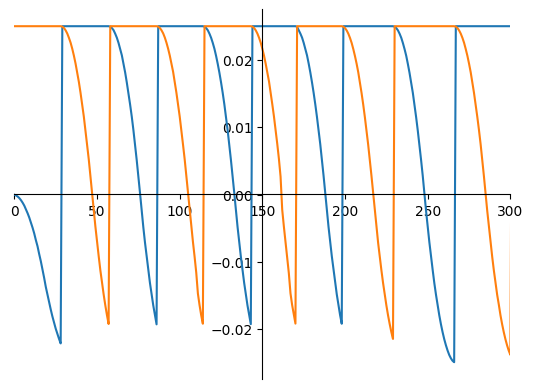

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.plot(df["left"])
ax.plot(df["right"])
ax.set_xlim(0, 300)
fig.show()